# Hepatitis C Prediction

In [ ]:
#Importing necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



# https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset


In [ ]:
hep_df = pd.read_csv('HepatitisCdata.csv')
hep_df .head(100)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0=Blood Donor,40,m,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
96,97,0=Blood Donor,40,m,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
97,98,0=Blood Donor,40,m,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
98,99,0=Blood Donor,40,m,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


In [ ]:
# Find info and shape of the data
print(hep_df.shape)
hep_df.info()

(615, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
# check for missing values
hep_df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
hep_df["Unnamed: 0"].value_counts()
hep_df.drop('Unnamed: 0',axis=1, inplace=True)
hep_df['ALP'].replace(np.NaN, hep_df['ALP'].mode()[0], inplace=True)
hep_df['PROT'].replace(np.NaN, hep_df['PROT'].mode()[0], inplace=True)
hep_df['CHOL'].replace(np.NaN, hep_df['CHOL'].mode()[0], inplace=True)
hep_df['ALT'].replace(np.NaN, hep_df['ALT'].mode()[0], inplace=True)
hep_df['ALB'].replace(np.NaN, hep_df['ALB'].mode()[0], inplace=True)
hep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
hep_df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [ ]:
hep_df = hep_df.dropna(axis=0)
hep_df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
hep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
hep_df.shape

(615, 13)

In [ ]:
hep_df['Sex'].replace(to_replace=['m', 'f'], value=[1, 0], inplace=True)
hep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


Exploratory Data Analysis

In [ ]:
# hep_corr = hep_df.drop(columns=["Unnamed: 0", "Category"]).corr()
hep_corr = hep_df.drop(columns=["Category"]).corr()
hep_corr

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.024544,-0.198264,0.164731,-0.005306,0.088666,0.032492,-0.075093,0.123096,-0.022296,0.153087,-0.153659
Sex,-0.024544,1.000000,0.145454,-0.021419,0.161155,0.130891,0.111177,0.169111,-0.027095,0.159589,0.133276,0.051216
ALB,-0.198264,0.145454,1.000000,-0.131346,0.000826,-0.193793,-0.221673,0.376018,0.204583,-0.001405,-0.156441,0.549152
ALP,0.164731,-0.021419,-0.131346,1.000000,0.124531,0.042589,0.034663,0.038685,0.132826,0.150943,0.423254,-0.070175
ALT,-0.005306,0.161155,0.000826,0.124531,1.000000,0.273316,-0.038292,0.146451,0.067079,-0.042966,0.248328,0.095570
AST,0.088666,0.130891,-0.193793,0.042589,0.273316,1.000000,0.312231,-0.208536,-0.209302,-0.021387,0.491263,0.039786
BIL,0.032492,0.111177,-0.221673,0.034663,-0.038292,0.312231,1.000000,-0.333172,-0.160659,0.031224,0.217024,-0.041845
CHE,-0.075093,0.169111,0.376018,0.038685,0.146451,-0.208536,-0.333172,1.000000,0.420208,-0.011157,-0.110345,0.293316
CHOL,0.123096,-0.027095,0.204583,0.132826,0.067079,-0.209302,-0.160659,0.420208,1.000000,-0.046642,-0.008387,0.205208
CREA,-0.022296,0.159589,-0.001405,0.150943,-0.042966,-0.021387,0.031224,-0.011157,-0.046642,1.000000,0.121003,-0.031722


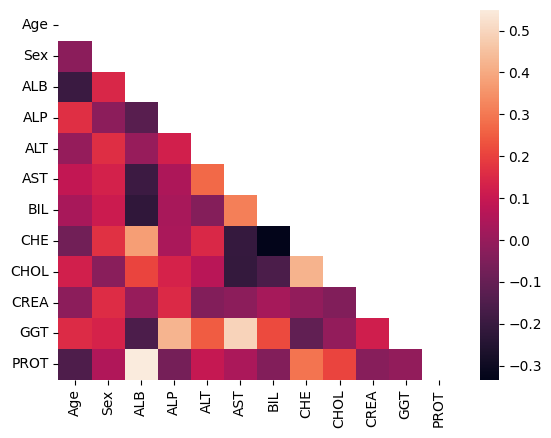

In [ ]:
sns.heatmap(hep_corr,annot=False, mask = np.triu(np.ones_like(hep_corr, dtype=bool)));

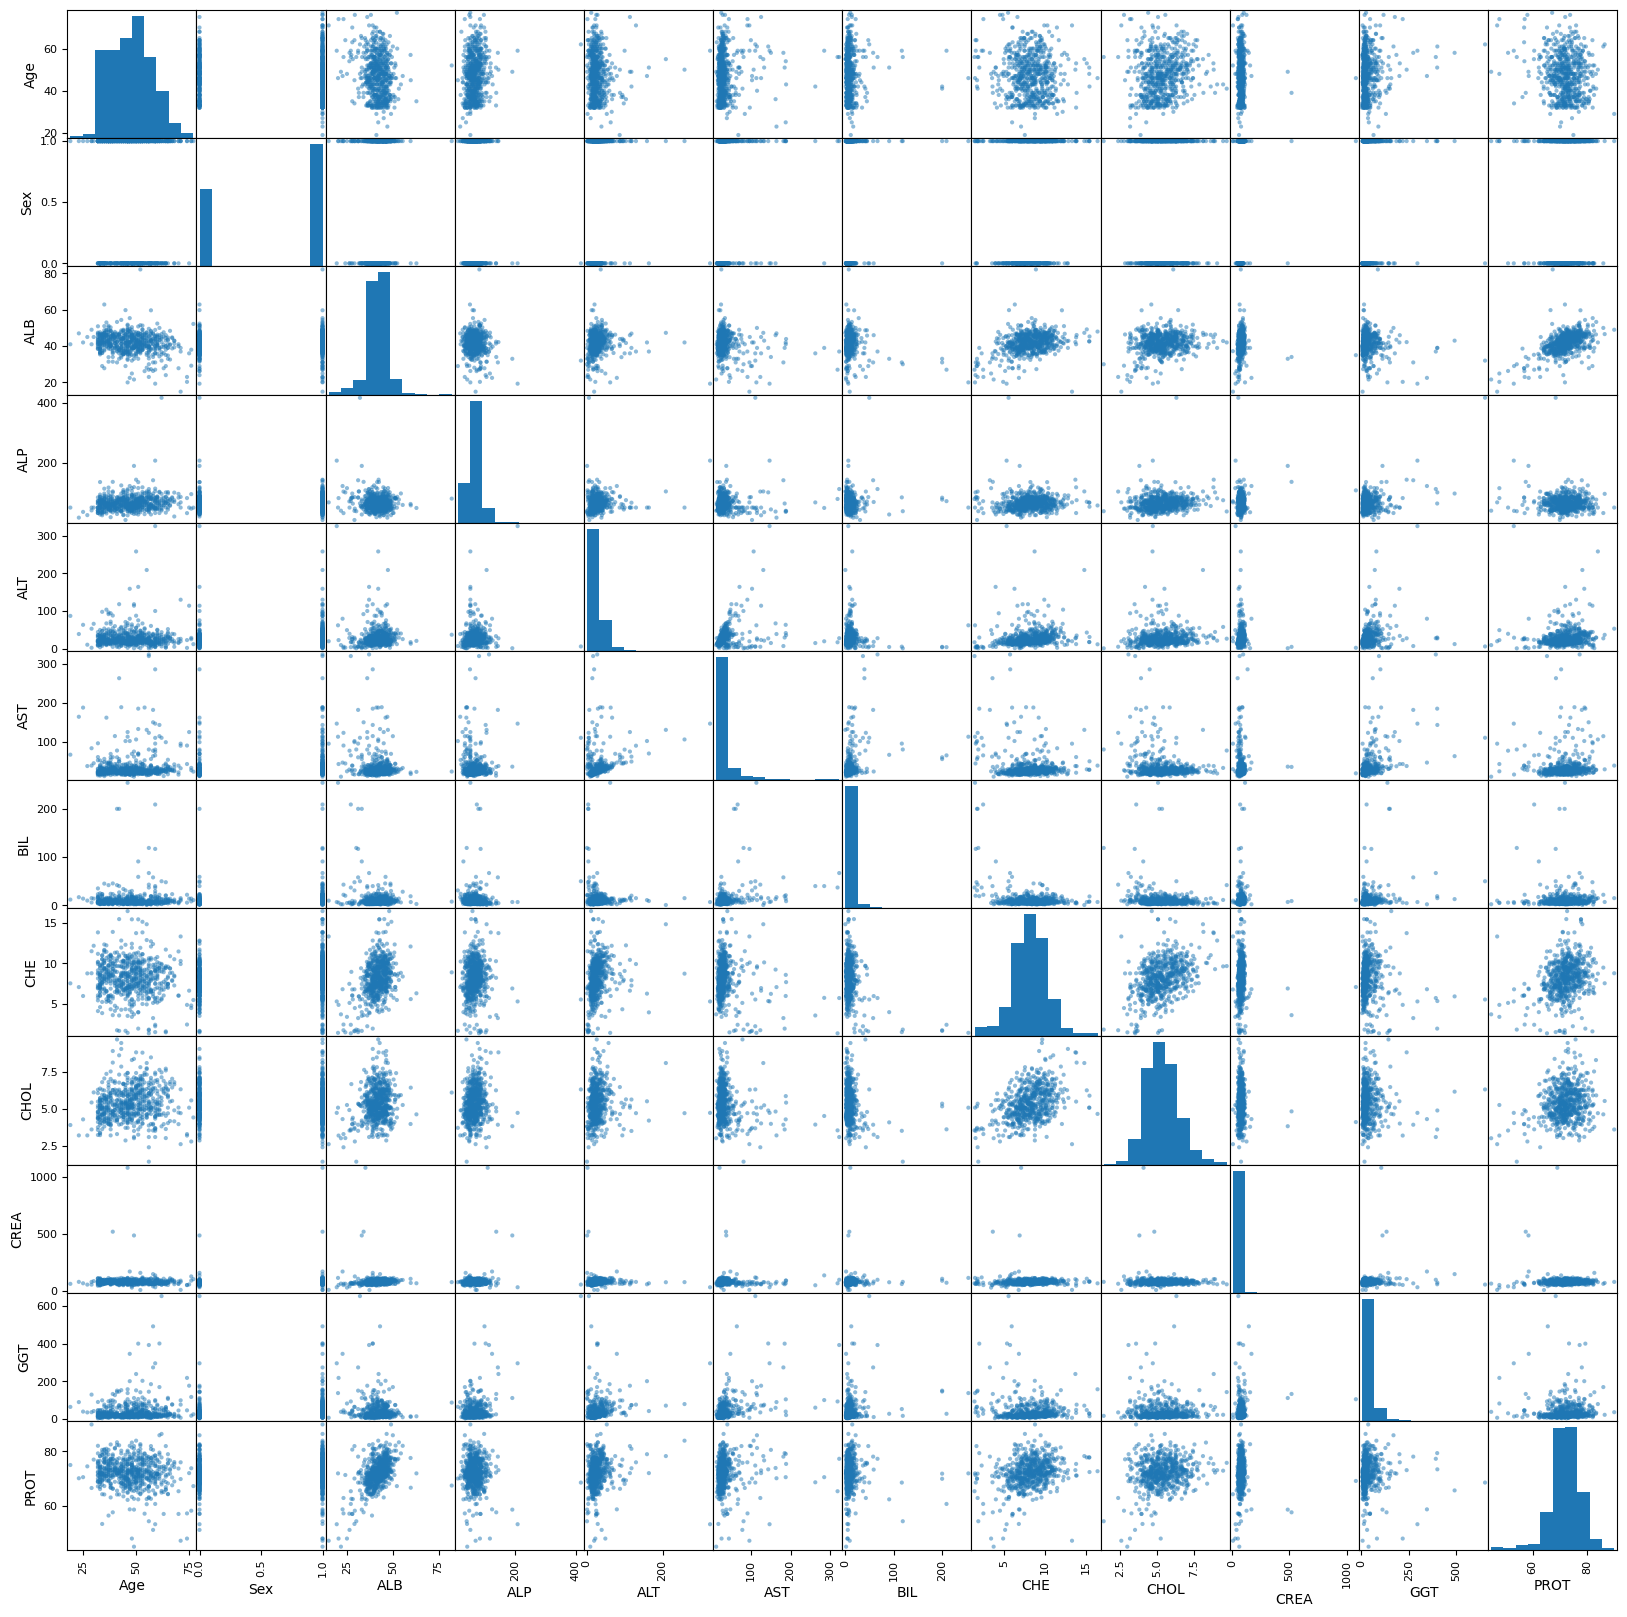

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(hep_df,figsize=(20,20))
plt.show()

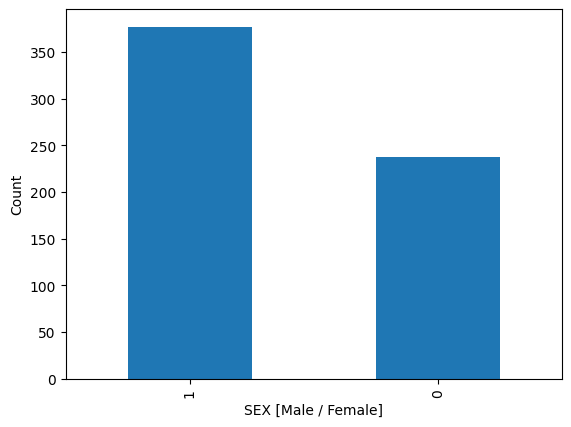

In [ ]:
plt.figure()
hep_df.Sex.value_counts().plot(kind='bar')
plt.xlabel("SEX [Male / Female]")
plt.ylabel("Count")
plt.show()

Developing and Testing the model

In [ ]:
X = hep_df.drop(columns=['Category'],axis=1) # 'Unnamed: 0'
y = hep_df['Category']
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
y

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(615, 12) (492, 12) (123, 12)


Imbalanced Dataset

In [ ]:
# Our target distribution is an imbalanced multi-class classification problem

# Apply SMOTE
# Assuming the smallest class has n samples, set n_neighbors < n
smote = SMOTE(random_state=42, k_neighbors=min(4, len(np.unique(y_train))-1))
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=42)
model = LogisticRegression(solver='newton-cg', max_iter=500, random_state=42)
model.fit(X_resampled, y_resampled)

# Predict probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Calculate ROC-AUC score with multi-class parameter
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9572034882495306


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(4, len(np.unique(y_train))-1))
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize classifiers
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
lr_model = LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
svc_model = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a voting classifier for the ensemble with soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('knn', knn_model),
        ('svc', svc_model),
        ('gb', gb_model)
    ],
    voting='soft'
)

# Fit ensemble model
ensemble_model.fit(X_resampled, y_resampled)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='newton-cg')),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=42))])),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [ ]:
# Predict probabilities for each class
y_pred_proba = ensemble_model.predict_proba(X_test)

# Calculate ROC-AUC score with multi-class parameter
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9880638314536153


In [ ]:
y_pred = ensemble_model.predict(X_test)
y_pred

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0s=suspect Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '2=Fibrosis', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '3=Cirrhosis', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '3=Cirrhosis', '0=Blood Donor', '2=Fibrosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0

In [ ]:
# Create DataFrame
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Add a column to check if predictions and actual labels match
results_df['Match'] = results_df['y_test'] == results_df['y_pred']
results_df

,y_test,y_pred,Match
270,0=Blood Donor,0=Blood Donor,True
454,0=Blood Donor,0=Blood Donor,True
235,0=Blood Donor,0=Blood Donor,True
470,0=Blood Donor,0=Blood Donor,True
58,0=Blood Donor,0=Blood Donor,True
...,...,...,...
337,0=Blood Donor,0=Blood Donor,True
494,0=Blood Donor,0=Blood Donor,True
493,0=Blood Donor,0=Blood Donor,True
443,0=Blood Donor,0=Blood Donor,True


In [ ]:
results_df[results_df['Match']==False]

,y_test,y_pred,Match
557,1=Hepatitis,2=Fibrosis,False
560,1=Hepatitis,0=Blood Donor,False
603,3=Cirrhosis,2=Fibrosis,False
121,0=Blood Donor,1=Hepatitis,False
610,3=Cirrhosis,1=Hepatitis,False


In [ ]:
results_df["Match"].value_counts()

Match
True     118
False      5
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validated accuracy
scores = cross_val_score(ensemble_model, X, y, cv=5)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.94308943 0.94308943 0.96747967 0.90243902 0.92682927]
Average score: 0.9365853658536585


In [ ]:
y_pred_df = results_df[['y_pred']]
y_pred_df.to_csv("Submission_file.csv", index=True)

from google.colab import files
files.download("Submission_file.csv")

y_pred_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,y_pred
270,0=Blood Donor
454,0=Blood Donor
235,0=Blood Donor
470,0=Blood Donor
58,0=Blood Donor
